<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/Redes%20Neuronales/M%C3%A9todos_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos de aprendizaje

##Gradiente descendiente

Sea el problema de optimización
$$\underset{x}{\arg\min} \;\; f(x)$$

para $f$ suave (2 veces continuamente diferenciable).

Luego, sea $x^t$ el punto actual. Entonces el vector
$$p^t = - \nabla\,f(x^t)$$ es una dirección de descenso (esto es, satisface $p^\top \nabla\,f(x^t) \lt0 $)

Notación. Para simplificar nuestra notación definimos:
$\nabla\,f^t \overset{def}{=} \nabla\,f(x^t)$

Por lo que el punto $x^{t+1}$   obtenido mediante la formula de actualización
$$\boxed{ x^{t+1} = x^{t} - \alpha \, \nabla\,f^t }$$

donde $\alpha$ es el tamaño de paso y para una $\alpha$ sufientemente pequeña se garantiza:
$$f(x^{t} - \alpha \, \nabla\,f^t) \lt f^{t}$$
 

si $\nabla\,f^t = 0$


**Ejemplo GD**

Calcular la raiz cuadrada de 2.

Notémos que $x=\sqrt{2}$  es solución de la ecuación no lineal:
$$f(x) \overset{def}{=} x^2 -2 = 0$$

Luego

In [ ]:
# solo por usar sympy

import sympy as sym
from sympy.abc import x
sym.init_printing()
sym.integrate(x**2-2, x)


$$\frac{x^{3}}{3} - 2 x$$

entonces definimos la función $g$ tal que $f= g^\prime$.
Y resolvemos:
$$\underset{x}{\arg\min} \;\; g(x) = \frac{x^3}{3} -2 x$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3,3,.1)  # from -3 to 3 in steps of .1
plt.plot(x,x**3/3-2*x)

Note que el mínimo esta precisamente en $\sqrt{2}$  (y la otra raiz está en el máximo, en $-\sqrt{2}$ ).

Usamos descenso de gradiente para culcular el mínimo.

In [ ]:
x = 0        # valor inicial de x
alpha = 0.2   # tamaño (pequeño) de paso

for t in range(40):
    x = x - alpha*(x**2-2)
    print('x1({0}) = {1}'.format(t,x))

que es muy cercano a $\sqrt{2}$.

In [ ]:
np.sqrt(2)

### Ejemplo de regresión



In [ ]:
from sklearn import linear_model, datasets

n_samples = 500
X, y = datasets.make_regression(n_samples=n_samples,
                                n_features=1,
                                n_informative=2, 
                                noise=5,
                                random_state=0) #2)
n_outliers=100
X[:n_outliers], y[:n_outliers] = datasets.make_regression(n_samples=n_outliers,
                                n_features=1,
                                n_informative=2, 
                                noise=2,
                                random_state=61)
y=np.expand_dims(y,axis=1)
plt.scatter(X[:],y[:], marker='.')

Agregamos en 1 a los datos de tal forma que nos queden en coordenadas homogéneas:
$$\hat{x}_i = [x_i, 1]$$
y el vector de coeficientes para regresión lineal esta dado por
$$\theta = [\theta_1, \theta_0]^\top$$

Luego, la función objetivo la definimos como

$$f(\theta) = \frac{1}{2 \kappa \, N} \sum_{i=0}^{N-1} 1- \exp\left( - \kappa [\theta^\top \hat x_i -y_i ]^2\right)$$
con derivadas parciales:
$$\frac{\partial}{\partial \theta_1}f(\theta) = - \frac{1}{N} \sum_{i=0}^{N-1} x_i [\theta^\top \hat x_i -y_i ] \exp\left( - \kappa [ \theta^\top \hat x_i -y_i]^2\right)$$

y
$$\frac{\partial}{\partial \theta_0}f(\theta) = - \frac{1}{N} \sum_{i=0}^{N-1} [\theta^\top \hat x_i -y_i] \exp\left( - \kappa [\theta^\top \hat x_i -y_i ]^2\right)$$

Entonces el gradiente de la función objetivo es

In [ ]:
#-------------------------------------------------------------
def grad_quadratic(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i (theta@x[i]-y[i])**2
    '''    
    X = f_params['X']
    y = f_params['y']

    err=theta[0]*X+theta[1]-y
    partial0=err
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.sum(gradient, axis=1)
#-------------------------------------------------------------
def grad_exp(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i 1-exp(-k(theta@x[i]-y[i])**2)
    '''
    kappa= f_params['kappa']
    X    = f_params['X']
    y    = f_params['y']
    err=theta[0]*X+theta[1]-y
    partial0=err*np.exp(-kappa*err**2)
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.mean(gradient, axis=0)
#-----------------------------------------

### Implementación descenso de gradiente simple (GD)


In [ ]:

def GD(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   función que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                     nIter = gd_params[0] número de iteraciones
                     alpha = gd_params[1] tamaño de paso alpha

    f_params  :   lista de parametros para la funcion objetivo
                     kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                     X     = f_params['X'] Variable independiente
                     y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    
    nIter = gd_params['nIter'] 
    alpha = gd_params['alpha']
    Theta=[]
    for t in range(nIter):
        p = grad(theta,f_params=f_params)
        theta = theta - alpha*p
        Theta.append(theta)
    return np.array(Theta)

## Descenso de Gradiente Estocástico (SGD)
Ahora considermos una variante del problema general, uno cuya función objetivo, o costo, se pueda denotar como la suma de muchos (si, muchos) pequeños costos. Esto es

$$\underset{x}{\arg\min} \;\; f(x) \overset{def}{=} \frac{1}{\sharp \Omega} \sum_{i \in \Omega} f_i(x)$$

En este caso, la dirección de descenso de gradiente esta dado por
$$p^t = - \nabla\,f^t \\ \;\;\;\;\;\; = - \frac{1}{\sharp \Omega} \sum_{i \in \Omega} \nabla f_i^t$$ 

Note que, $p^t$ puede ser interpretado como un valor esperado (promedio sobre toda la población). Esto es:

$$p^t = - \mathbb{E} \{\nabla f_i^t \} \;\;\; \text{para} \;\; i=1,2,\ldots, \sharp \Omega$$

donde $\sharp \Omega$ denota la cardinalidad (número de elementos) en el conjunto $\Omega$.

El término estocástico viene por el hecho de que, si en cada iteración, en vez de tomar la suma sobre toda la población, solo lo hacemnos sobre una muestra
$S^t \subset \Omega$

Luego

$$\tilde p^t = - \frac{1} {\sharp S^t} \sum_{i \in S^t} \nabla f_i^t$$

Esto equivale a calcular el gradiente como el promedio de los gradientes de la muestra.

**Ventajas del SGD:**

* Si la función objetivo es la suma de de costos individuales (errores) sobre un conjunto muy grande de datos. La muestra suele ser representativa y producir un valor muy cercano al de la población.

* Se reduce el número de cálculos en cada iteración.

* Cuando hay datos atípicos (outliers), las muestras pueden ser robustas a esas “pocas” grandes desviaciones (salvo en aquellas muestras que sean incluidos, que se esperan sean pocas).

* Si la función objetivo es (ruidosa, tiene muchos mínimos locales pequeños). El gradiente estocástico permite suavizar la función objetivo y reduce el riesgo de tener una convergencia temprana.

**Desventajas del SGD:**

* El efecto de los outliers en el gradiente de una muestra puede afectar mas fuertemente y desviar al algoritmo de su trayectoria de convergencia.

**Implementación descenso de gradiente estocástico (SGD)**

In [ ]:
def SGD(theta=[], grad=None, gd_params=[], f_params=[]):
    '''
    Descenso de gradiente estocástico
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      batch_size = gd_params['batch_size'] tamaño de la muestra
                      
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    (high,dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    
    nIter      = gd_params['nIter']
    alpha      = gd_params['alpha']
        
    Theta=[]
    for t in range(nIter):
        # Set of sampled indices
        smpIdx = np.random.randint(low=0, high=high, size=batch_size, dtype='int32')
        # sample 
        smpX = f_params['X'][smpIdx]
        smpy = f_params['y'][smpIdx]
        # parametros de la funcion objetivo
        smpf_params ={'kappa' : f_params['kappa'], 
                      'X'     : smpX , 
                      'y'     : smpy}
        
        p = grad(theta,f_params=smpf_params)
        theta = theta - alpha*p
        Theta.append(theta)
        
    return np.array(Theta)

##Descenso de Gradiente con Momento (Inercia)

Descenso de gradiente es un método muy robusto y se mantiene aproximandose constantemente hacia un mínimo local. Este puede ser a su vez un problema:

En caso de tener funciones de costo con muchas pequeñas oscilaciones, GD es propenso a ser atrapado en “malos minímos locales”.

Si se esta muy lejos del óptimo y el tamaño de paso es pequeño, entonces GD tendrá una convergencia muy lenta

Para reducir el efecto de los problemas mencionados, se ha propuesto incluir inercia. Esto es, mientras GD puede comprenderse con la analogía de un caminante que siempre dá un paso cosntante en la dirección que localmente tienen el mayor descenso. Descenso de Gardiente con Momento (MGD) sería el equivalente a una partícula masiva bajo el efecto de la gravedad. En tal caso, la partícula se acelera conforme acumule varios pasos en descenso. En el caso de la partícula, la acelaración puede incrementarse hasta alcanzar su velocidad límite: aquella en la que la fuerza de gravedad se equipare con la fuerza que ejerce la fricción de la superficie y del aire. La velocidad límite es la explicación al porqué un proyectil lanzado por un arma de fuego verticalmente no regresa con la misma velocidad con que salió del fusil, o el porqué la caida de los paracaidistas no se acelera durante todo el descenso; de hecho los paracaidistas maniobran para modificar su arrastre y así incrementar o decrementar la velocidad de caida; y así poder mantenerse acercarse y permanecer junto a otros miembros del grupo. Igualmente, podemos imponer a nuestra partícula en su descenso por la superficie de la función costo que además de momento (momentum), tenga una velocidad límite. Esto lo dejaremos para después, por lo pronto nos centraremos en el momento o inercia.

La modificación para incluir momento en GD consiste en lo siguiente:

1. Sea $g^t = \nabla f^tg $  el gradiente en el punto actual; luego 
2. Calcular la dirección de descenso con $p^t = g^t + \eta p^{t-1}p $; y
3. actualizar el punto con $x^{t+1} = x^t - \alpha p^t$ .

La siguiente figura muestra gráficamente la actualización mediante MGD

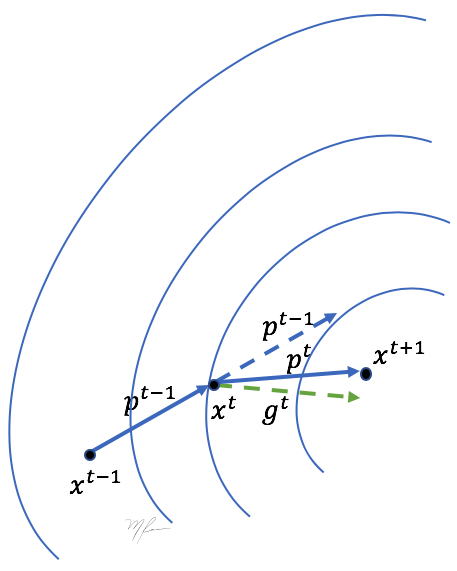

Analizando el cálculo de la dirección de descenso observamos que:
$$p^t = g^t + \eta p^{t-1} \\ \;\;\;\;\;\;\;\; = g^t + \eta g^{t-1} + \eta p^{t-2}] \\ \;\;\;\;\;\;\;\;\;\;\;\; = g^t + \eta g^{t-1} + \eta^2 g^{t-2} + \eta^3 p^{t-3} \\ \;\; = \sum_{i=0}^{t} \eta^{i} g^{t-i}$$

donde asumimos que $p^{(-1)}=0$

Notamos que se están integrando todos los gradientes de la trayectoria, pesando mas los gradientes mas recientes.

Para conservar el efecto de los gradientes recientes y suavizar la trayectoria, se recomienda $\eta$ cercana y menor que 1 , de hecho $\eta=0.9$ es un valor comúnmente utilizado.

In [ ]:
eta =0.9
t=10
etapow = [eta**i for i in range(t)]
print('Efecto de t (peso) en gradientes pasados')
print('\n'.join('{0} : {1:2.2E}'.format(*k) for k in enumerate(etapow)))

plt.plot(etapow)
plt.show()

La integración de los gradientes pasados permite accumular la componente de los gradientes que apuntan en la misma dirección y cancelar las componentes normales a dicha trayectoria.

**Implementación descenso de gradiente con momento (MGD)**

In [ ]:
def MGD(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente con momento (inercia)
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p_old = np.zeros(theta.shape)
    Theta=[]
    for t in range(nIter):
        g = grad(theta, f_params=f_params)
        p = g + eta*p_old
        theta = theta - alpha*p
        p_old=p
        Theta.append(theta)
    return np.array(Theta)

## Descenso acelerado de Nesterov (NAG)
El algoritmo de descenso con momento no ha demostrado que si bien el momento ayuda a accelerar la convergencia y reducir el riesgo de quedar atrapado en mínimos locales, también tienen una tendencia a sobrepasar los valles. Por ello, mediante una pequeña modificación se reducirá el effecto de sobrepaso (overshooting). Esta modificación es el algoritmo de Descenso Acelerado de Neasterov (NAG).

El algoritmo NAG puede considerarse del tipo de dos pasos Predictor-Corrector. En el paso predictor se extrapola linealmente la trayectoria actual. Luego, en el punto predicho, se evalua el gradiente y se hace la correción de la trayectoria. Con ello se logra un aproximación de segundo orden de la trayectoria con un costo computacional similar al de Descenso de Gardiente con Momento (MGD). Al mantener el efecto de inercia pero reducir los sobrepasos, NAG también se incrementa la razón de convergencia

Las fórmulas de actualización del algoritmo NAG estan dadas por los siguientes puntos

1. Sea $\tilde x^{t} = x^t - \alpha p^{t-1} $  el punto predicho en primer orden (usando la dirección anterior); luego
2. Calcular el gradiente en el punto predicho: $g^t = \nabla f(\tilde x^{t})$; entonces
3. Calcular la dirección de descenso con $p^t = g^t + \eta p^{t-1} $ ; y
4. Actualizar el punto con $x^{t+1} = x^t - \alpha p^t$

La siguiente figura muestra gráficamente la actualización mediante NAG:

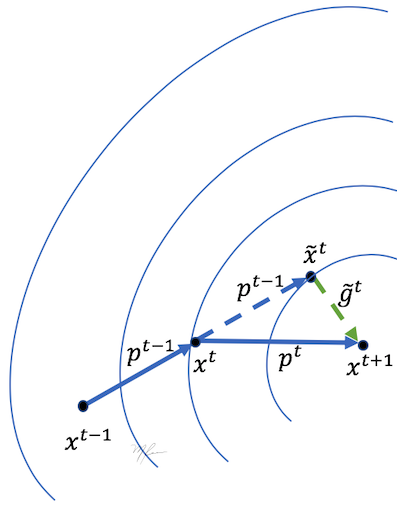

**Implementación del algoritmo NAG**

In [ ]:
def NAG(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso acelerado de Nesterov
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p     = np.zeros(theta.shape)
    Theta=[]
    
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta, f_params=f_params)
        p = g + eta*p
        theta = theta - alpha*p
        Theta.append(theta)
    return np.array(Theta)

## Descenso de Gradiente Adaptable (ADAGRAD)
Considere el caso en que la magnitud del gradiente de la función es relativamente grande (aun estamos lejos del óptimo). Dado que la magitud del gradiente es una cantidad a la que contribuyen todas las derivadas parciales, es posible que a pesar de tener una magnitud grande, existan coordenadas donde la función cambia poco (derivadas parciales de norma pequeña). Lo que convienen hacer es que se den pasos grandes en las componentes del gradiente que son grandes (en valor absoluto) y pasos cortos en las componentes pequeñas.

Los algortimos MGD como NAG se enfocan en estimar mejor la dirección de descenso. Sin embargo, el desempeño de dichos algoritmos se ve comprometido por la correcta selección del tamaño de paso $\alpha$. Para ello, el algoritmo ADAGRAD busca estimar el correcto tamaño de paso en cada iteración estimando un tamaño de paso para cada una de las variables en forma independiente.

Las fórmulas de actualización del algoritmo NAG estan dadas por los siguientes puntos:

1. Sea
$$g^t_i \overset{def}{=} \frac{\partial }{\partial x_i}f^t$$
la $i$-ésima derivada parcial de la función en el punto actual $x^{t}$; esto es $g^t_i = [\nabla f^t]_i$, entonces

2. Calcular la suma de los cuadrados de las parciales hasta la iteración actual:
$$G^t_i \overset{def}{=} \sum_{k=0}^t (g^k_i)^2$$;
y

3. Actualiza el punto con
$$x^{t+1} = x^t - \frac{\alpha}{\sqrt{G_i^t + \epsilon}} p^t$$
donde $\epsilon$ es una constante pequeña que evita la división por cero.

## Descenso de Gradiente Adaptable (ADADELTA)
Note que el término $G^t_i$ en ADAGRAD se mantienen acumulando las derivadas parciales desde el inicio de las iteraciones. Esto puede reducir en forma temprana el tamaño de paso para algunos parámetros. Por ello, es mejor ir reduciendo paulatinamente la contribución de términos pasados.

Para ello, es conveniente realizar ajuste similar a la intergación de las direcciones pasadas:

1. Sea $$g^t_i \overset{def}{=} \frac{\partial }{\partial x_i}f^t$$
la $i$-ésima derivada parcial de la función en el punto actual $x^{t}$; esto es $g^t_i = [\nabla f^t]_i$, entonces
2. integrar los cuadrados de las parciales hasta la iteración actual:
$$G^t_i = \eta (g^t_i)^2 + (1-\eta) G^{t-1}_i$$
con $\eta$ grandes (típicamente $\eta =0.9$ $η=0.9$); y
3. actualizar el punto, donde cada elemento tienen su propio paso
$$x^{t+1}_i = x^t_i - \frac{\alpha}{\sqrt{G_i^t} + \epsilon} p^t_i$$

**Implementación del algoritmo ADADELTA**

In [ ]:
def ADADELTA(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable (ADADELTA) 
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADADELTA'] tamaño de paso alpha
                      eta      = gd_params['eta']  parametro adaptación del alpha
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADADELTA'] 
    eta      = gd_params['eta']
    G        = np.zeros(theta.shape)
    g        = np.zeros(theta.shape) 
    Theta=[]
    for t in range(nIter):
        g = grad(theta, f_params=f_params)
        G = eta*g**2 + (1-eta)*G
        p = 1.0/(np.sqrt(G)+epsilon)*g
        theta = theta - alpha * p
        Theta.append(theta)
    return np.array(Theta)

##Momentum Adaptable (ADAM)
El algoritmo ADAM calcula la dirección de descenso usando momentum (similar a MGD) y utiliza una estrategia similar para calcular adaptar el tamaño de paso. Es decir, utiliza momuntum para actualizar el paso, lo que evita cambios bruscos en el paso. Esto lo hace muy estable para su uso en estrategia tipo Gradiente Estocástico (SGD) donde las muestras pueden provocar cambios grandes en la magnitud del gradiente, además calcula un paso global en vez de usar un paso para cada variable. También adecuado en estrategias de entrenamiento tipo estocásticas o por lotes, como en el caso de Redes Neuronales Profundas (Deep Learning)

Una mejora importante es la correción del sezgo (bias) en la estimación de los momentos.

Generalmente las razones de aprendizaje (momentum) son cercanas a 1, típicamente: $\eta_1=0.94$ y $\eta_2=0.999$ 

Una iteración del algoritmo ADAM se resume en los siguientes pasos:

Sea $g_t \overset{def}{=} \nabla f_t$
la $i$-ésima derivada parcial de la función en el punto actual $x^{t}$. Entonces

1. Calcular la dirección de descenso con momentum
$$p_t = \eta_1 p_{t-1} + (1-\eta_1) g_t$$
 donde $p_t$  conserva la escala de $p_{t+1}$ y el gradiente $g^t$.

2. Luego, actualizar, a la vez con momentum, el factor adaptativo del descenso $v^{t}$:
$$v_t = \eta_2 v_{t-1} + (1-\eta_2) G_t.$$
donde $\overline G = [g_i^2, g_2^2, \ldots, g_n^2]^\top $ es el vector de elementos a cuadrado del gradiente.

3. Escalar la dirección de descenso y el momentum (reducción del sezgo):
$$\hat p_t = \frac{1}{1- (\eta_1)^t} p_t \\ \hat v_t = \frac{1}{1- (\eta_2)^t} v_t$$

4. Actualizar el punto con la fórmula de paso adaptable
$$x_{t+1} = x_t - \frac{\alpha}{\sqrt{\hat v_t} + \epsilon} \hat p_t$$

**Importancia de la reducción del sesgo**

El paso 1 del algoritmo ADAM pretende mejorar el cálculo del gradiente, calculado general mente sobre solo una muestra, promediandolo con los gradientes recientemente calculados:

$$p_t = \eta_1 p_{t-1} + (1-\eta_1) g_t \\ = \eta_1^2 p_{t-2} + \eta_1 (1-\eta_1) g_{t-1} + (1-\eta_1) g_t \\ = \eta_1^3 p_{t-3} + \eta_1^2 (1-\eta_1) g_{t-2} + \eta_1 (1-\eta_1) g_{t-1} + (1-\eta_1) g_t \\ \ldots$$

Si asumimos $p_0=0$ como condicion inicial de las iteraciones, nos lleva a
$$p_t = (1-\eta_1) \sum_{i=0}^{t} \eta_1^{t-i} g_{i}$$

Tomando valores esperados, y usando $\mathbb{E}\{xy\} = \mathbb{E}\{x\} \mathbb{E}\{y\}$, si $x$ y $y$ son independientes:

$$\mathbb{E}\{p_t\} = \mathbb{E}\{g_t\} (1-\eta_1) \sum_{i=0}^{t} \eta_1^{t-i}$$
 
Luego usamos la propiedad de la serie geométrica
$$\sum_{k=0}^{n-1} x^k = \frac{1-x^n}{1-x}$$
lo que resulta en
$$\mathbb{E}\{p_t\} = \mathbb{E}\{g_t\} (1-\eta_1^{t})$$
por lo que para corregur este factor se hace
$$\hat p_t = \frac{p_t}{1-\eta^t}$$​	
 

**Implementación del algoritmo ADAM**

In [ ]:
def ADAM(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de Gradiente Adaptable con Momentum(A DAM) 
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter    = gd_params['nIter'] número de iteraciones
                      alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                      eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                 de descenso (0,1)
                      eta2     = gd_params['eta2'] factor de momentum para la el 
                                 tamaño de paso (0,1)
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    epsilon= 1e-8
    nIter    = gd_params['nIter']
    alpha    = gd_params['alphaADAM'] 
    eta1     = gd_params['eta1']
    eta2     = gd_params['eta2']
    p        = np.zeros(theta.shape)
    v        = 0.0
    Theta    = []
    eta1_t = eta1
    eta2_t = eta2
    for t in range(nIter):
        g  = grad(theta, f_params=f_params)
        p  = eta1*p + (1.0-eta1)*g
        v  = eta2*v + (1.0-eta2)*(g**2)
        #p = p/(1.-eta1_t)
        #v = v/(1.-eta2_t)
        theta = theta - alpha * p / (np.sqrt(v)+epsilon)
        eta1_t *= eta1
        eta2_t *= eta2
        Theta.append(theta)
    return np.array(Theta)

## Evaluación del los algoritmos de descenso de gradiente

In [ ]:
# condición inicial
theta=10*np.random.normal(size=2)
#theta= [-0.61752689 -0.76804482]
# parámetros del algoritmo
gd_params = {'alpha'          : 0.95, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.95,
             'nIter'          : 300,
             'batch_size'     : 100,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999}

# parámetros de la función objetivo
f_params={'kappa' : 0.01, 
          'X'     : X , 
          'y'     : y}


Descenso de Gradiente

In [ ]:
ThetaGD = GD(theta=theta, grad=grad_exp, 
             gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaGD[-1,:])

Descenso de Gradiente estocástico

In [ ]:
ThetaSGD = SGD(theta=theta, grad=grad_exp, 
               gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaSGD[-1,:])

Descenso de Gradiente con Inercia

In [ ]:
ThetaMGD = MGD(theta=theta, grad=grad_exp, 
               gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaMGD[-1,:])

Nesterov

In [ ]:
ThetaNAG = NAG(theta=theta, grad=grad_exp, 
               gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaMGD[-1,:])

ADADELTA

In [ ]:
ThetaADADELTA = ADADELTA(theta=theta, grad=grad_exp, 
                         gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaADADELTA[-1,:])

ADAM

In [ ]:
ThetaADAM = ADAM(theta=theta, grad=grad_exp, 
                 gd_params=gd_params, f_params=f_params)
print('Inicio:', theta,'-> Fin:', ThetaADAM[-1,:])

In [ ]:
Tmax=100
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(ThetaNAG[:Tmax], '.')
plt.title('NAG')

plt.subplot(212)
plt.plot(ThetaADAM[:Tmax], '.')
plt.title('ADAM')

plt.show()


Gráfico de trayectorias de integración

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 14

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
nIter=np.expand_dims(np.arange(ThetaGD.shape[0]),1) 
Tmax=200
ax.plot(ThetaGD[:Tmax,0],  ThetaGD [:Tmax,1], nIter[:Tmax,0], label='GD')
ax.plot(ThetaSGD[:Tmax,0], ThetaSGD[:Tmax,1], nIter[:Tmax,0], label='SGD')
ax.plot(ThetaMGD[:Tmax,0], ThetaMGD[:Tmax,1], nIter[:Tmax,0], label='MGD')
ax.plot(ThetaNAG[:Tmax,0], ThetaNAG[:Tmax,1], nIter[:Tmax,0], label='NAG')
ax.plot(ThetaADADELTA[:Tmax,0], ThetaADADELTA[:Tmax,1], nIter[:Tmax,0], label='ADADELTA')
ax.plot(ThetaADAM[:Tmax,0], ThetaADAM[:Tmax,1], nIter[:Tmax,0], label='ADAM')
ax.legend()
ax.set_title(r'Trayectorias los parámetros calculados con distintos algoritmos')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.set_zlabel('Iteración')
plt.show()

## Ejemplo Sintético 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sys 

def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles


gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
#print("VT",X[0,:],"tel",X[1,:])
print("HS",Y[0,:])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

print(X[:,1:5])


In [ ]:
import tensorflow as tf
hidden_layer_size=8
output_size = 1
#We build the model, necessary when using tensorflow

model = tf.keras.Sequential([

    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation='sigmoid') 
    #calculates the dot productof the inputsand he weights and add bias
])


model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

#Which deta tensorflow has to fit?
#model.fit(inputs,targets) fits (trains) the model

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

print((X.T).shape, Y[0,:].shape)

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)
print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Descenso de gradiente con Momento (Momentum)
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)
print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Nadam
model.compile(optimizer = 'Nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)

print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Adagrad
model.compile(optimizer = 'Adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)
print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Adadelta
model.compile(optimizer = 'Adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)

print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#Adam
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer,loss) configures the model for training

model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0) # verbose = 0 is for not showing progress bar

test_loss, test_acc = model.evaluate(X.T, Y[0,:],  verbose=2)

print(test_loss, test_acc)

history = model.fit(X.T, Y[0,:], epochs = 1000,   verbose = 0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()